<a href="https://colab.research.google.com/github/apotnis07/Airline-Passenger-Satisfaction/blob/main/Airline_Passenger_Satisfaction_Logistic_Regression%2C_KNN%2C_Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd "/content/drive/MyDrive/ML Project"
!pwd

/content/drive/MyDrive/ML Project
/content/drive/MyDrive/ML Project


In [ ]:
import numpy as np
import pandas as pd
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

In [ ]:
#Loading the dataset
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")
df_train.drop(df_train.columns[0],axis=1,inplace=True)
df_test.drop(df_test.columns[0],axis=1,inplace=True)
df_train.drop("id", axis = 1, inplace = True)
df_test.drop("id", axis = 1, inplace = True)
df_train

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,Female,disloyal Customer,23,Business travel,Eco,192,2,1,2,3,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,Male,Loyal Customer,49,Business travel,Business,2347,4,4,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,Male,disloyal Customer,30,Business travel,Business,1995,1,1,1,3,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,1,5,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


In [ ]:
df_train = df_train.dropna()
df_test = df_test.dropna()


<Axes: xlabel='satisfaction', ylabel='count'>

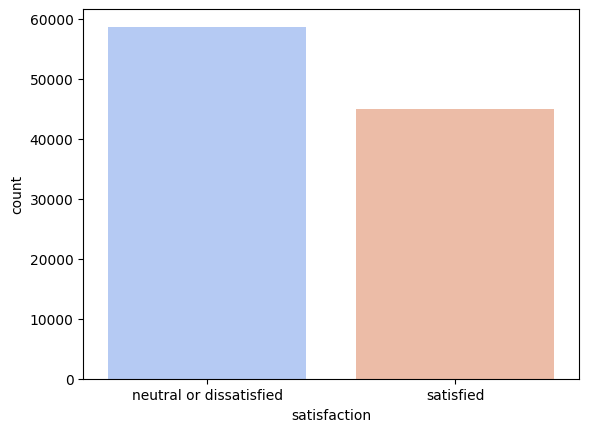

In [ ]:
sns.countplot(data=df_train, x="satisfaction", palette = "coolwarm")

<Axes: xlabel='Gender', ylabel='count'>

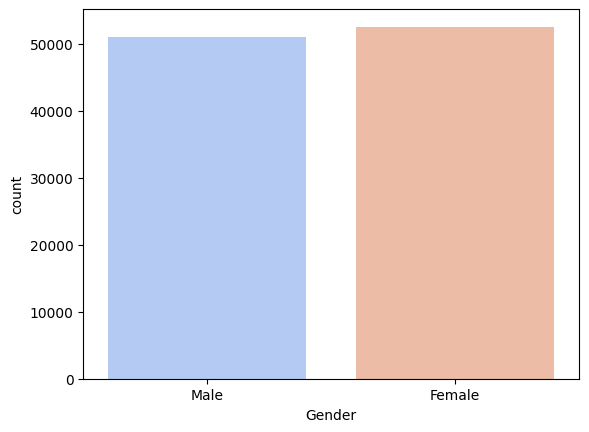

In [ ]:
sns.countplot(data=df_train, x="Gender", palette = "coolwarm")

<Axes: xlabel='Inflight wifi service', ylabel='count'>

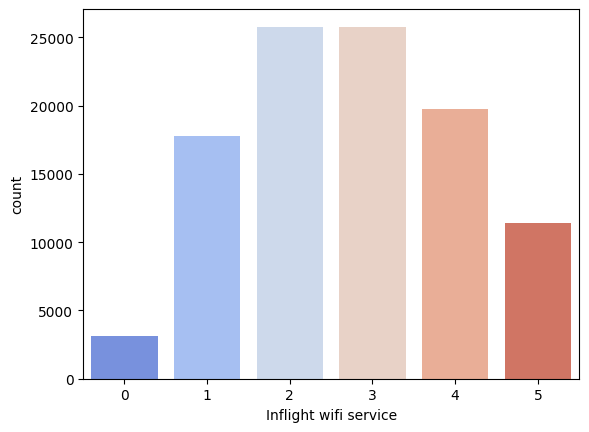

In [ ]:
sns.countplot(data=df_train, x="Inflight wifi service", palette = "coolwarm")

<Axes: xlabel='Ease of Online booking', ylabel='count'>

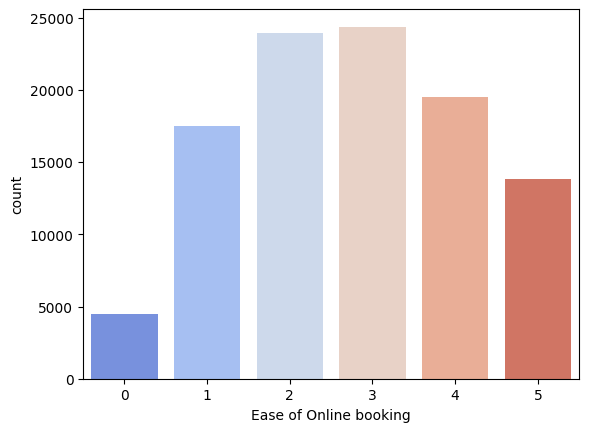

In [ ]:
sns.countplot(data=df_train, x="Ease of Online booking", palette = "coolwarm")

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df_train['Type of Travel']=label_encoder.fit_transform(df_train['Type of Travel'])
df_train['Class']=label_encoder.fit_transform(df_train['Class'])
df_train['Customer Type']=label_encoder.fit_transform(df_train['Customer Type'])
df_train['satisfaction']=label_encoder.fit_transform(df_train['satisfaction'])
df_train['Gender']=label_encoder.fit_transform(df_train['Gender'])
df_test['Type of Travel']=label_encoder.fit_transform(df_test['Type of Travel'])
df_test['Class']=label_encoder.fit_transform(df_test['Class'])
df_test['Customer Type']=label_encoder.fit_transform(df_test['Customer Type'])
df_test['satisfaction']=label_encoder.fit_transform(df_test['satisfaction'])
df_test['Gender']=label_encoder.fit_transform(df_test['Gender'])

<ipython-input-27-66cc40e1da4f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['Type of Travel']=label_encoder.fit_transform(df_train['Type of Travel'])
<ipython-input-27-66cc40e1da4f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['Class']=label_encoder.fit_transform(df_train['Class'])
<ipython-input-27-66cc40e1da4f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

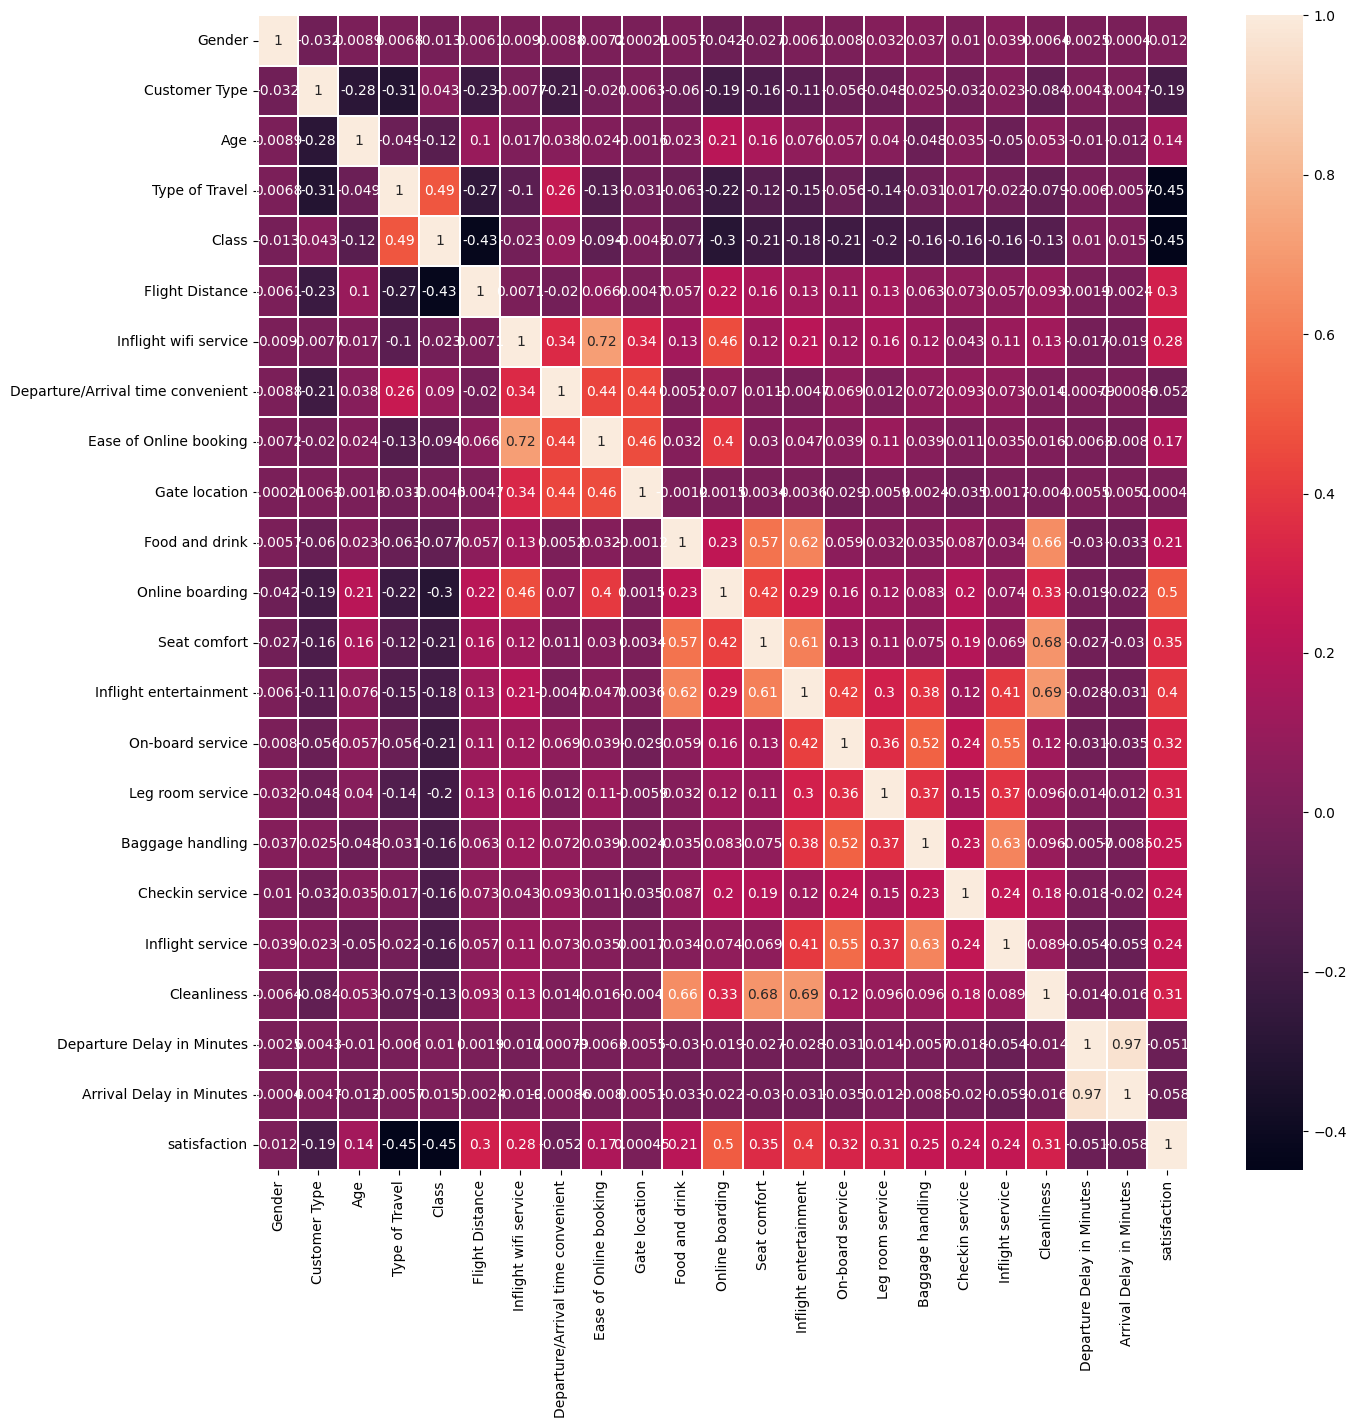

In [ ]:
# Remember to include feature selection for slides and write code here
plt.figure(figsize=(15,15))
sns.heatmap(df_train.corr(),annot=True, linewidths=.1,)
plt.show()
df_train = df_train.drop(['Gender','Departure/Arrival time convenient','Gate location','Departure Delay in Minutes','Arrival Delay in Minutes'],axis=1)
df_test = df_test.drop(['Gender','Departure/Arrival time convenient','Gate location','Departure Delay in Minutes','Arrival Delay in Minutes'],axis=1)

In [ ]:

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report

X_train = df_train.drop(columns=['satisfaction'])
y_train = df_train['satisfaction']
X_test = df_test.drop(columns=['satisfaction'])
y_test = df_test['satisfaction']
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
y_train = scaler.fit_transform(np.array(y_train).reshape(-1,1))
X_test = scaler.fit_transform(X_test)
y_test = scaler.fit_transform(np.array(y_test).reshape(-1,1))

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel

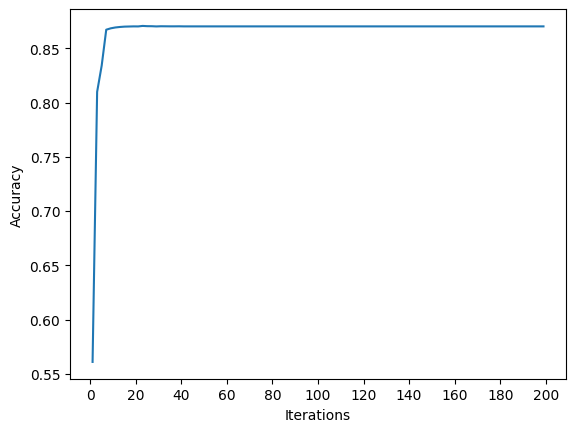

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8701579577491986
[[-2.0077479  -0.65769118 -2.91152179 -1.09044006 -0.02331379  1.89929956
  -0.96694859 -0.09713164  3.11671563  0.30976124  0.38064104  1.4956101
   1.25143055  0.4975087   1.57381449  0.67148914  1.02772776]]
              precision    recall  f1-score   support

         0.0       0.86      0.91      0.89     14528
         1.0       0.88      0.82      0.85     11365

    accuracy                           0.87     25893
   macro avg       0.87      0.86      0.87     25893
weighted avg       0.87      0.87      0.87     25893



In [ ]:
#logistic regression model
j = np.arange(1,201,step = 2)
accuracy=[]
for i in range(1,201,2):
    reg = LogisticRegression(max_iter = i)
    reg.fit(X_train,y_train)
    accuracy.append(accuracy_score(y_test,reg.predict(X_test)))
plt.plot(j,accuracy)
plt.ylabel('Accuracy')
plt.xlabel('Iterations')
plt.xticks(np.arange(0,201,step = 20))
plt.show()
reg = LogisticRegression(max_iter = 200)
reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(reg.coef_)
print(classification_report(y_test, y_pred))

In [ ]:
# Include loss graph for knn to pick the best k in a range
#Knn went up from 74 percent to 92 with feature selection
from sklearn.neighbors import KNeighborsClassifier

k = np.arange(1,11)
accuracy=[]
for i in range(1,11):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    accuracy.append(accuracy_score(y_test,knn.predict(X_test)))
plt.plot(k,accuracy)
plt.ylabel('Accuracy')
plt.xlabel('K values')
plt.xticks(np.arange(1,11,step = 1))
plt.show()

knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
accuracy_score(y_test,y_pred)
print(classification_report(y_test, y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


              precision    recall  f1-score   support

         0.0       0.92      0.97      0.94     14528
         1.0       0.96      0.89      0.92     11365

    accuracy                           0.93     25893
   macro avg       0.94      0.93      0.93     25893
weighted avg       0.94      0.93      0.93     25893



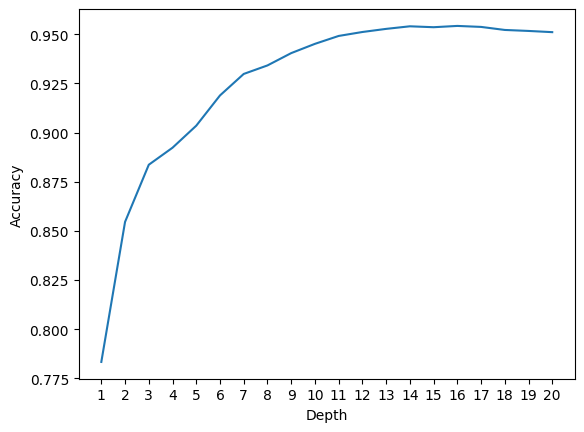

In [ ]:
#Decision Tree
X_train = df_train.drop(columns=['satisfaction'])
y_train = df_train['satisfaction']
X_test = df_test.drop(columns=['satisfaction'])
y_test = df_test['satisfaction']
d = np.arange(1,21)
accuracy=[]
for i in range(1,21):
    dec = DecisionTreeClassifier(criterion='entropy',max_depth = i)
    dec.fit(X_train,y_train)
    accuracy.append(accuracy_score(y_test,dec.predict(X_test)))

plt.xticks(np.arange(1,21, step=1))
plt.ylabel('Accuracy')
plt.xlabel('Depth')
plt.xticks(np.arange(1,21, step=1))
plt.plot(d,accuracy)


In [ ]:
dec_tree = DecisionTreeClassifier(criterion='entropy',max_depth = 11)
from sklearn import tree
X_train = df_train.drop(columns=['satisfaction'])
y_train = df_train['satisfaction']
X_test = df_test.drop(columns=['satisfaction'])
y_test = df_test['satisfaction']
dec_tree.fit(X_train,y_train)
y_pred = dec_tree.predict(X_test)
accuracy_score(y_test,y_pred)
print(classification_report(y_test, y_pred))

most_features_frame = pd.DataFrame(
    data=dec_tree.feature_importances_,
    columns=["importance"],
    index=X_train.columns,
).sort_values(by=["importance"], ascending=False)

print(most_features_frame[0:10])

              precision    recall  f1-score   support

           0       0.94      0.97      0.96     14528
           1       0.96      0.92      0.94     11365

    accuracy                           0.95     25893
   macro avg       0.95      0.95      0.95     25893
weighted avg       0.95      0.95      0.95     25893

                        importance
Online boarding           0.358108
Inflight wifi service     0.225093
Type of Travel            0.147677
Inflight entertainment    0.056994
Class                     0.051412
Customer Type             0.048993
Checkin service           0.030092
Baggage handling          0.021145
Inflight service          0.012620
Seat comfort              0.011610
